# Data preprocessing
In this part of the notebook, we will preprocess the data to make it ready for training. We will do the following steps:
1. Visualize the RTM data
2. Check the sampling rate of the data and resample to consist to 16kHz to enssure uniformity across the dataset 


Dataframe:
    Turn Onset  Turn Duration Speaker Name
0        0.40           6.64        spk00
1        8.68          55.96        spk00
Prepared Dataframe:
    Turn Onset  Turn Duration Speaker Name  End Time
0        0.40           6.64        spk00      7.04
1        8.68          55.96        spk00     64.64


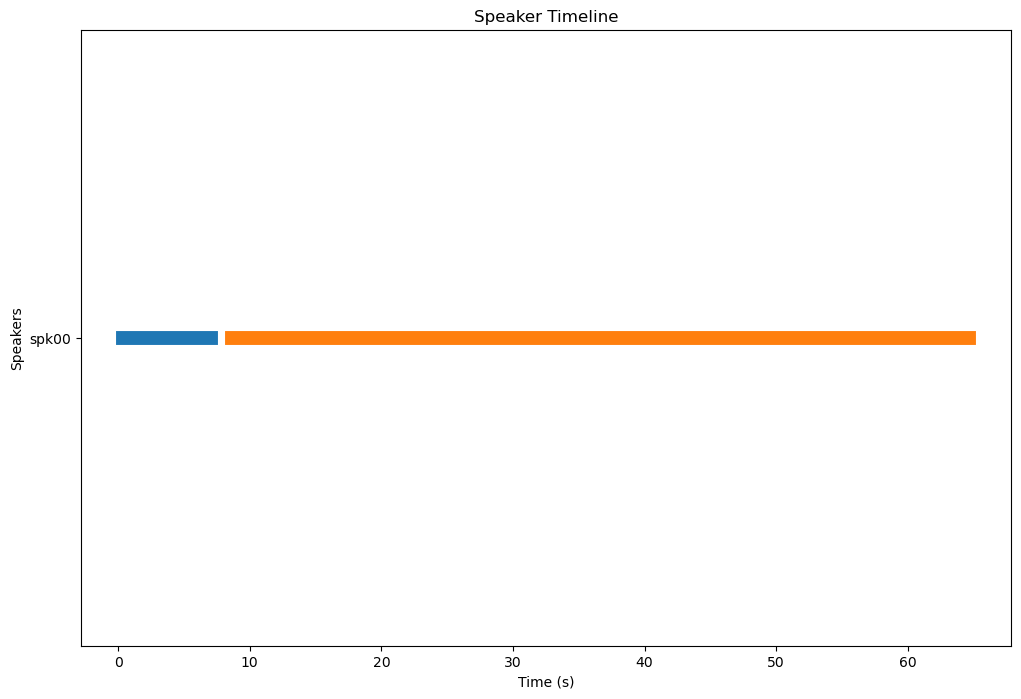

In [13]:
# Visualize the RTM data

# All importss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#     test_path = "../Dataset/RTMS/Dev/abjxc.rttm"


# Parse the dummy RTTM file
def parse_rttm(file_path):
    columns = [
        "Type",
        "File ID",
        "Channel ID",
        "Turn Onset",
        "Turn Duration",
        "Orthography Field",
        "Speaker Type",
        "Speaker Name",
        "Confidence Score",
        "Signal Lookahead Time",
    ]
    df = pd.read_csv(file_path, delim_whitespace=True, names=columns)
    return df[["Turn Onset", "Turn Duration", "Speaker Name"]]


# Prepare the parsed data
def prepare_data(rttm_data):
    rttm_data["Turn Onset"] = rttm_data["Turn Onset"].astype(float)
    rttm_data["Turn Duration"] = rttm_data["Turn Duration"].astype(float)
    rttm_data["End Time"] = rttm_data["Turn Onset"] + rttm_data["Turn Duration"]
    return rttm_data


# Plot the timeline
import matplotlib.pyplot as plt


def plot_timeline(data):
    fig, ax = plt.subplots(figsize=(12, 8))

    speakers = data["Speaker Name"].unique()
    speaker_indices = {speaker: idx for idx, speaker in enumerate(speakers)}

    for idx, row in data.iterrows():
        start = row["Turn Onset"]
        end = row["End Time"]
        speaker = row["Speaker Name"]
        ax.plot([start, end], [speaker_indices[speaker]] * 2, linewidth=10)

    ax.set_yticks(range(len(speakers)))
    ax.set_yticklabels(speakers)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Speakers")
    ax.set_title("Speaker Timeline")

    plt.show()


def debugger_test():
    test_path = "../Dataset/RTMS/Dev/abjxc.rttm"

    try:
        df = parse_rttm(test_path)
        print("Dataframe:\n", df.head())
        df = prepare_data(df)
        print("Prepared Dataframe:\n", df.head())
    except FileNotFoundError:
        print(f"File not found: {test_path}")
    except Exception as e:
        print(f"An error occurred: {e}")
    
    plot_timeline(df)


debugger_test()